In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [3]:
!ls -a # Klasörün oluşturulduğunu teyit edelim

.  ..  .config	.kaggle  sample_data


In [0]:
import json
token = {"username":"kendi_user_adiniz","key":"kendi_keyiniz"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [8]:
!kaggle competitions download -c the-nature-conservancy-fisheries-monitoring

  0% 0.00/3.74k [00:00<?, ?B/s]
100% 3.74k/3.74k [00:00<00:00, 2.97MB/s]
 98% 226M/231M [00:02<00:00, 84.7MB/s]
100% 231M/231M [00:02<00:00, 106MB/s] 
100% 830M/832M [00:12<00:00, 124MB/s]
100% 832M/832M [00:12<00:00, 71.2MB/s]
  0% 0.00/35.8k [00:00<?, ?B/s]
100% 35.8k/35.8k [00:00<00:00, 36.6MB/s]
100% 1.07G/1.07G [00:09<00:00, 141MB/s]
100% 1.07G/1.07G [00:09<00:00, 121MB/s]


In [13]:
!ls {/content}/competitions/the-nature-conservancy-fisheries-monitoring

sample_submission_stg1.csv.zip	test_stg1.zip  train.zip
sample_submission_stg2.csv.zip	test_stg2.7z


In [18]:
 !unzip -q "{/content}/competitions/the-nature-conservancy-fisheries-monitoring/train.zip"

replace train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/train/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train/ALB/img_00003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [19]:
!ls {/content}/competitions/the-nature-conservancy-fisheries-monitoring

sample_submission_stg1.csv.zip	test_stg1.zip  train.zip
sample_submission_stg2.csv.zip	test_stg2.7z


In [21]:
!ls train/

ALB  BET  DOL  LAG  NoF  OTHER	SHARK  YFT


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
from pathlib import Path

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = 'train/'

In [0]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224)

In [27]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
DOL,DOL,DOL,DOL,DOL
Path: train;

Valid: LabelList (755 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ALB,SHARK,DOL,OTHER,ALB
Path: train;

Test: None

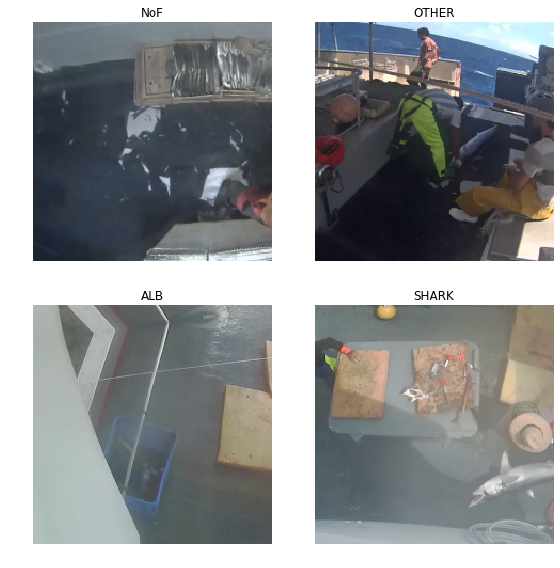

In [28]:

data.show_batch(rows=2)

In [29]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 85945110.73it/s]


In [30]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.958366,1.153027,0.362914,02:54
1,1.309121,0.727398,0.254305,02:53
2,1.001455,0.589294,0.206623,02:55
3,0.817550,0.502555,0.162914,02:52
4,0.731716,0.499687,0.162914,02:53


In [0]:
learn.save('stage1')

In [0]:
learn.load('stage1')

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


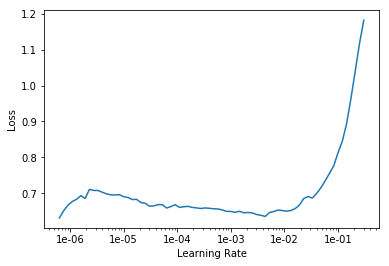

In [33]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.634215,0.479157,0.157616,02:53
1,0.617999,0.437471,0.132450,02:56
2,0.564990,0.403646,0.128477,02:58
3,0.531527,0.390806,0.115232,02:59
4,0.510674,0.386786,0.115232,03:00


**Resnet50**

In [36]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 89199736.16it/s]


In [37]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.675630,0.884675,0.275497,03:11
1,1.094879,0.535246,0.177483,03:07
2,0.821044,0.416226,0.136424,03:07
3,0.659297,0.380620,0.131126,03:07
4,0.559082,0.368595,0.135099,03:06


In [0]:
learn.save('stage2')

In [39]:

learn.load('stage2')

Learner(data=ImageDataBunch;

Train: LabelList (3022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
DOL,DOL,DOL,DOL,DOL
Path: train;

Valid: LabelList (755 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ALB,SHARK,DOL,OTHER,ALB
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, 

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


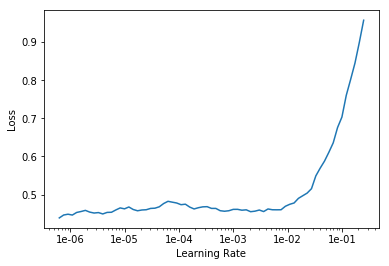

In [41]:
learn.recorder.plot()

In [0]:

learn.unfreeze()

In [43]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.471756,0.292555,0.105960,03:11
1,0.402406,0.262263,0.074172,03:11
2,0.312084,0.206456,0.055629,03:11
3,0.217801,0.177849,0.049007,03:12
4,0.156290,0.176453,0.043709,03:11


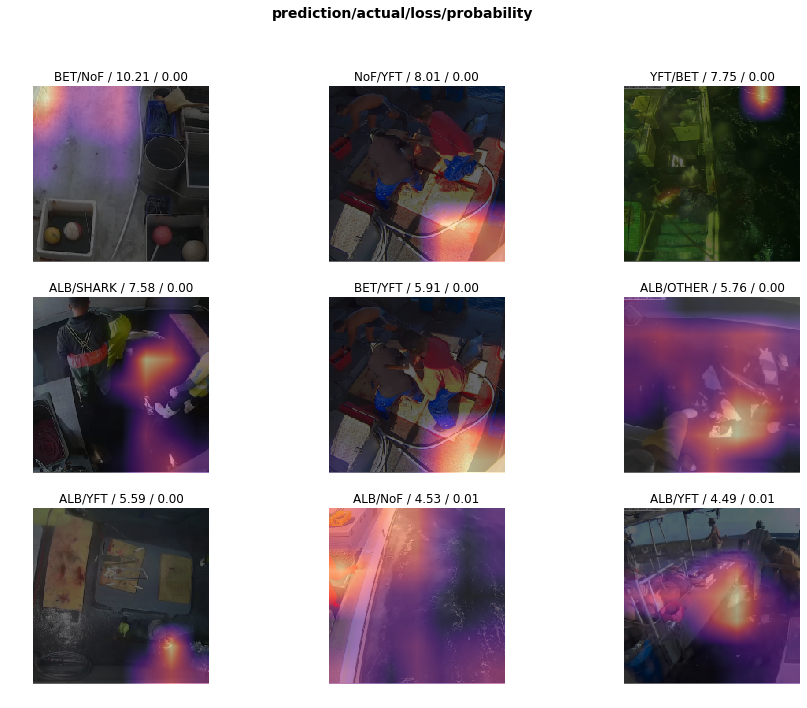

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15, 11))

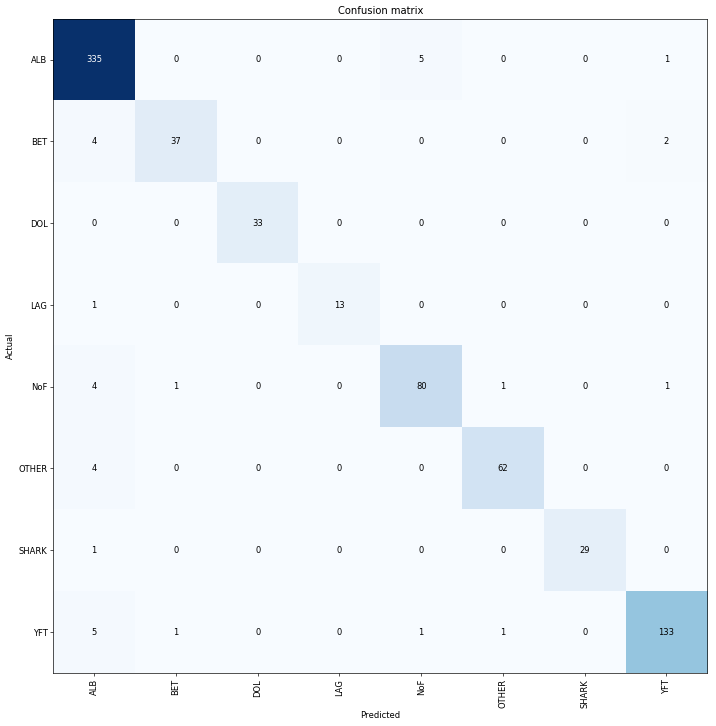

In [45]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [46]:
interp.most_confused()

[('ALB', 'NoF', 5),
 ('YFT', 'ALB', 5),
 ('BET', 'ALB', 4),
 ('NoF', 'ALB', 4),
 ('OTHER', 'ALB', 4),
 ('BET', 'YFT', 2),
 ('ALB', 'YFT', 1),
 ('LAG', 'ALB', 1),
 ('NoF', 'BET', 1),
 ('NoF', 'OTHER', 1),
 ('NoF', 'YFT', 1),
 ('SHARK', 'ALB', 1),
 ('YFT', 'BET', 1),
 ('YFT', 'NoF', 1),
 ('YFT', 'OTHER', 1)]